# correlation / convloution
 - 녹화_2022_05_08_13_51_09_191


In [1]:
import scipy

In [2]:
from scipy.signal import correlate # 신호처리
from scipy.ndimage import correlate # 이미지

In [4]:
# 연습용 데이터
import skimage

In [5]:
# 연습용 데이터 종류
dir(skimage.data)

['astronaut',
 'binary_blobs',
 'brain',
 'brick',
 'camera',
 'cat',
 'cell',
 'cells3d',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'colorwheel',
 'create_image_fetcher',
 'data_dir',
 'download_all',
 'eagle',
 'file_hash',
 'grass',
 'gravel',
 'horse',
 'hubble_deep_field',
 'human_mitosis',
 'image_fetcher',
 'immunohistochemistry',
 'kidney',
 'lbp_frontal_face_cascade_filename',
 'lfw_subset',
 'lily',
 'logo',
 'microaneurysms',
 'moon',
 'nickel_solidification',
 'page',
 'protein_transport',
 'retina',
 'rocket',
 'shepp_logan_phantom',
 'skin',
 'stereo_motorcycle',
 'text',
 'vortex']

In [6]:
from skimage.data import astronaut

In [7]:
data = astronaut()

In [8]:
import matplotlib.pyplot as plt

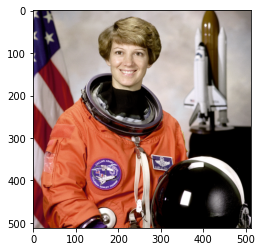

In [11]:
plt.imshow(data)

In [17]:
from skimage.util import view_as_blocks
block = view_as_blocks(data, (4,4,3)) # 4 by 4 by 3 으로 쪼갠다
block.shape

# shape 의 변화를 이해하기. (****** 핵심 *******)
# (512, 512, 3) 을 (4, 4, 3) 으로 쪼갠다.
# (512, 512, 3) 가 3차원 이므로 (4,4) 로는 나눌 수 없다.

# 예 --------------------------
# (300, 300, 10) 을 (3, 3, 2) 로 나누면
# (100, 100, 5, 3, 3, 2) 가 된다.

(128, 128, 1, 4, 4, 3)

----
- 다른 예

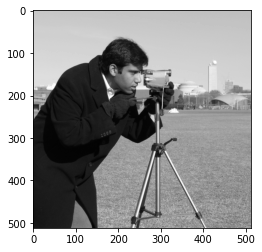

In [21]:
from skimage.data import camera
data = camera()
plt.imshow(data, cmap='gray')

In [22]:
data.shape

(512, 512)

In [24]:
block = view_as_blocks(data, (8,8))
block.shape

# (512, 512) 를 (8, 8) 로 block 하면 (64, 64) 로 변한다.
# (64, 64) 의 한 점은 (8, 8) 정보를 가지고 있다. [ = (8,8)이 2 차원으로 (64, 64) 만큼 있다.]
# 이때, (8, 8) 을 하나로 flatten 시키면, 점 하나가 64 만큼 정보를 가지고 있다.


#### 필터의 기본 => 왜?
# 이미지는 글로벌 정보도 중요하지만, 픽셀이 가지는 로컬정보 (내 주위의 정보)가 
# 나를 해석하는데 아주 중요하므로 => 디테일을 죽이지 않는 방식
# 일반적으로 홀수를 더 많이 쓴다.

(64, 64, 8, 8)

In [ ]:
# 여기서 (8, 8) 을 하나의 점으로 바꾸려고 한다. 어떤 방법을 사용하나?
# => max, min, mean, median 등 있지, 사용하면 각 특성을 고려하지 못한다.

##### correlation 연산 #####
# 따라서, 각 점에 weight 를 주어서, 하나의 값로 바꿈 (내적 연산) => mp.dot
# 각각의 디테일이 살아서 로컬적인 의미를 분명히 할 수 있다.
# x = np.array([1,2,3])
# y = np.array([w1,w2,w3])

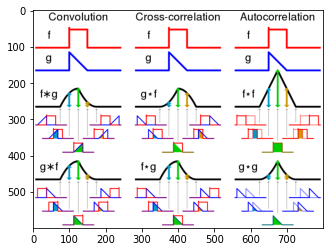

In [26]:
# correlation 과 convolution 연산의 차이
import cv2
im1 = cv2.imread('convolution_correlation.png')
plt.imshow(im1)

In [27]:
# convolution 연산은 처음에 반전을 시킴 => 왜? => 교환법칙이 성립하게 하기 위해
# 반전을 시키지 않으면 교환법칙이 성립하지 않음

# 실제 convolution neural network 는 실제 correlation 을 사용 => 왜?
# 예) 커널필터 (-1, 0, 1)을 flip 해서 (1, 0 ,-1)로 바꾸고 난 뒤 correlation 을 해야 함.
# 하지만, 연산량을 줄이기 위해 처음부터 flip 된 커널 (1, 0 ,-1) 에 correlation 연산을 한다.
# flip 하는 연산량을 줄일 수 있다. 
# (말만 conv 고, 내부연산은 corr 로 한다.)

---

# convolution / correlation

In [34]:
import scipy
import numpy as np

In [29]:
from scipy.signal import correlate # 신호처리
from scipy.ndimage import correlate # 이미지

In [30]:
# 필터 사용
cv2.filter2D

<function filter2D>

In [44]:
data = camera()
kernel = np.array([[1,0,1], [1,0,1], [1,0,1]])
kernel2 = np.array([[1,1,1], [1,1,1], [1,1,1]])
kernel3 = np.array([[1,1,1], [1,1,1], [1,1,1]]) / 100
kernel4 = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
kernel

# 커널의 핵심
# 필터의 크기와 값에 따라서 => 희미, 선명, 가장자리 등으로 나타냄

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [50]:
filterd_image = cv2.filter2D(data, -1, kernel)
filterd_image2 = cv2.filter2D(data, -1, kernel2)
filterd_image3 = cv2.filter2D(data, -1, kernel3)
filterd_image4 = cv2.filter2D(data, -1, kernel4)
# plt.imshow(filterd_image, cmap='gray')

<function matplotlib.pyplot.show(close=None, block=None)>

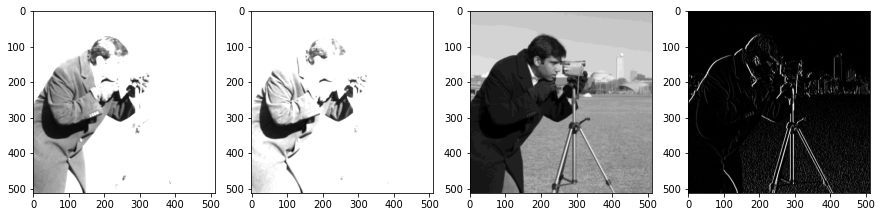

In [52]:
fig = plt.figure(figsize= (15,15))

plt.subplot(1,4,1)
plt.imshow(filterd_image, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(filterd_image2, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(filterd_image3, cmap='gray')

plt.subplot(1,4,4)
plt.imshow(filterd_image4, cmap='gray')

plt.show

# 하얀색으로 나오는 것은 값이 커서

<function matplotlib.pyplot.show(close=None, block=None)>

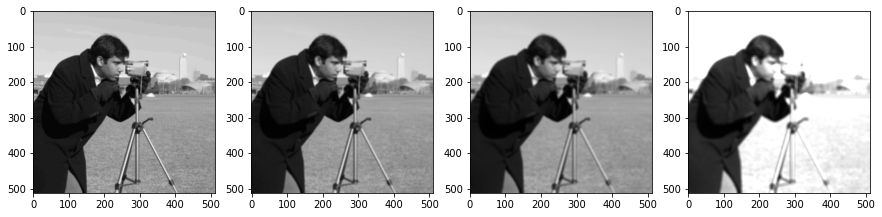

In [53]:
# 실험 - 필터 크기에 따른 비교
kernel = np.ones((3,3)) / 50
kernel2 = np.ones((5,5)) / 50
kernel3 = np.ones((7,7)) / 50
kernel4 = np.ones((9,9)) / 50

filterd_image = cv2.filter2D(data, -1, kernel)
filterd_image2 = cv2.filter2D(data, -1, kernel2)
filterd_image3 = cv2.filter2D(data, -1, kernel3)
filterd_image4 = cv2.filter2D(data, -1, kernel4)

fig = plt.figure(figsize= (15,15))

plt.subplot(1,4,1)
plt.imshow(filterd_image, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(filterd_image2, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(filterd_image3, cmap='gray')

plt.subplot(1,4,4)
plt.imshow(filterd_image4, cmap='gray')

plt.show

# 필터가 클 수록 디테일은 줄어 든다. 
# but 주위 상황을 더 크게 만들기 때문에 global 적인 의미를 더 가진다.
# 어떤 필터 크기가 좋은지는 상황에 따라 다른다.

In [ ]:
# ---------------------
# 1. ML 에서 raw 데이터로 model 을 만드는데, 성능을 올리기 위해 data cleaning, data scailing
#    등이 있다. 이는 데이터 변화이다.
#    image 로 바꾸어 생각하면, 성능을 올리기 위해 이미지를 변화를 준다.
#    그 중 가장 강력한 것이 filter 이다. 

# ML 성능을 올리는 image 는 어떤 image 인지?
# ML 성능을 올리는 filter 는 어떤 filter 인지?
# 두 질문에 답을 할수 없다. (범용적인 해결책은 없다.)

# 따라서, 목적은 filter 를 찾는것이다.
# 사람이 특성을 뽑아서 만든 알고리즘 보다, 데이터 특성에 맞게 쓰는게 맞다.
# 

2022_05_08_13_51_191

1:51:00

[06] introduction.pdf
p.32